In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.patches import Ellipse

import quantumsolver as qs

# help(qs.fewnucleonEmulator)

# Vectorized version of the fewnucleonEmulator
vfewnucleonEmulator = np.vectorize(qs.fewnucleonEmulator)


In [3]:
# LaTeX font
plt.style.use('default')
plt.rc('text', usetex = True)
plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['font.family'] = 'serif'
plt.rcParams['text.latex.preamble'] = r'\usepackage{amsmath}'
font_size = 14
plt.rcParams['font.size'] = font_size

cD_grid = np.linspace(-2.5, 2.5, 100)
cE_grid = np.linspace(-1., 1., 100)

# Create a 2-dimensional grid
cD_eval, cE_eval = np.meshgrid(cD_grid,cE_grid)


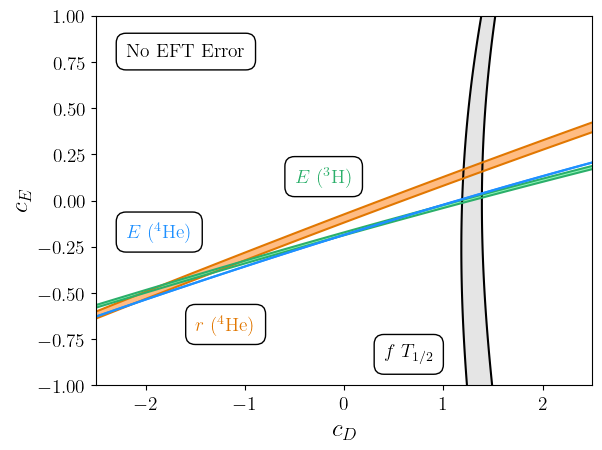

In [4]:

def constraint_plotter(cD_eval, cE_eval, efterror=False):

    E4He_eval, Rp4He_eval, _, E3He_eval, E3H_eval, _, fT3H_eval = vfewnucleonEmulator(cD_eval, cE_eval)
            
    fig, ax = plt.subplots()

    x = 1

    mean_E4He = -28.296 # np.mean(E4He_eval)
    mean_Rp4He = 1.4552  # np.mean(Rp4He_eval)
    mean_E3H = -8.482 # np.mean(E3H_eval) 
    mean_fT3H = 1129.6 #np.mean(fT3H_eval)

    sigma_E3H = 0.015
    sigma_E4He = 0.005
    sigma_Rp4He = 0.0062
    sigma_fT3H = 3.

    if efterror:
        sigma_E3H = np.sqrt(0.015 + (1 * 0.33**4 * -8.482)**2/(1 - 0.33**2))
        sigma_E4He = np.sqrt(0.005 + (1 * 0.33**4 * -28.296)**2/(1 - 0.33**2))
        sigma_Rp4He = np.sqrt(0.0062 + (1 * 0.33**4 * 1.4552)**2/(1 - 0.33**2))
        sigma_fT3H = np.sqrt(3. + (1 * 0.33**4 * 1129.6)**2/(1 - 0.33**2))
        ax.text(-2.2, 0.7, 'With EFT Error \n $\\bar{c}=1$, $Q=0.33$', color='black', 
        bbox=dict(facecolor='none', edgecolor='black', boxstyle='round,pad=0.5'), fontsize=font_size)
    else:
        ax.text(-2.2, 0.78, 'No EFT Error', color='black', 
        bbox=dict(facecolor='none', edgecolor='black', boxstyle='round,pad=0.5'), fontsize=font_size)

    cs = ax.contourf(cD_eval, cE_eval, fT3H_eval, levels=[mean_fT3H-x*sigma_fT3H, mean_fT3H+x*sigma_fT3H], colors='gray', alpha=0.2)
    contour_lines = ax.contour(cs, levels=cs.levels[:3], colors='black')
    cs = ax.contourf(cD_eval, cE_eval, Rp4He_eval, levels=[mean_Rp4He-x*sigma_Rp4He, mean_Rp4He+x*sigma_Rp4He], colors='#ffb16d', alpha=0.85)
    contour_lines = ax.contour(cs, levels=cs.levels[:3], colors='#e17701')
    cs = ax.contourf(cD_eval, cE_eval, E3H_eval, levels=[mean_E3H-x*sigma_E3H, mean_E3H+x*sigma_E3H], colors='#7af9ab', alpha=0.8)
    contour_lines = ax.contour(cs, levels=cs.levels[:3], colors='#2baf6a', linestyles='-')
    cs = ax.contourf(cD_eval, cE_eval, E4He_eval, levels=[mean_E4He-x*sigma_E4He, mean_E4He+x*sigma_E4He], colors='dodgerblue', alpha=0.5)
    contour_lines = ax.contour(cs, levels=cs.levels[:3], colors='dodgerblue', linestyles='-')

    return ax

def customizer(ax):

    ax.set_xlabel('$c_D$', fontsize=font_size+4)
    ax.set_ylabel('$c_E$', fontsize=font_size+4)
    ax.text(0.4, -0.85, '$f$ $T_{1/2}$', color='black', 
        bbox=dict(facecolor='none', edgecolor='black', boxstyle='round,pad=0.5'), fontsize=font_size)
    ax.text(-1.5, -0.7, '$r$ ($^4$He)', color='#e17701', 
        bbox=dict(facecolor='none', edgecolor='black', boxstyle='round,pad=0.5'), fontsize=font_size)
    ax.text(-0.5, .1, '$E$ ($^3$H)', color='#2baf6a', 
        bbox=dict(facecolor='none', edgecolor='black', boxstyle='round,pad=0.5'), fontsize=font_size)
    ax.text(-2.2, -0.2, '$E$ ($^4$He)', color='dodgerblue', 
        bbox=dict(facecolor='none', edgecolor='black', boxstyle='round,pad=0.5'), fontsize=font_size)
    ax.tick_params(axis='x', labelsize=font_size)
    ax.tick_params(axis='y', labelsize=font_size)

save = False
efterror = False

### Comment after one use for customization of text boxes by changing
### the customizer function
ax = constraint_plotter(cD_eval, cE_eval, efterror=efterror)

for txt in ax.texts[1:]:
    txt.set_visible(False)
    ax.texts[1:].remove(txt)

customizer(ax)

fig = ax.get_figure()
if efterror and save:
    fig.savefig('figs/constraints_EFT_exp.pdf', bbox_inches='tight')
elif save:
    fig.savefig('figs/constraints_noEFT_exp.pdf', bbox_inches='tight')


In [5]:
import emcee
import scipy.stats as stats
import corner

sigma_E3H = np.sqrt(0.015 + (1 * 0.33**4 * -8.482)**2/(1 - 0.33**2))
sigma_E4He = np.sqrt(0.005 + (1 * 0.33**4 * -28.296)**2/(1 - 0.33**2))
sigma_Rp4He = np.sqrt(0.0062 + (1 * 0.33**4 * 1.4552)**2/(1 - 0.33**2))
sigma_fT3H = np.sqrt(3. + (1 * 0.33**4 * 1129.6)**2/(1 - 0.33**2))

def log_prior(params):
    
    cD, cE = params
    cD_mu = 0.
    cD_sigma = 5
    cE_mu = 0.
    cE_sigma = 5

    return (np.sum(stats.norm.logpdf(cD, loc=cD_mu, scale=cD_sigma)) + 
            np.sum(stats.norm.logpdf(cE, loc=cE_mu, scale=cE_sigma)))   

def log_likelihood(params, data_set):
    cD, cE = params
    E4He, Rp4He, _, _, E3H, _, fT3H = vfewnucleonEmulator(cD, cE)

    # mean_E4He = np.mean(E4He) # -28.296
    # mean_Rp4He = np.mean(Rp4He) # 1.4552
    # mean_E3H = np.mean(E3H) # -8.482
    # mean_fT3H = np.mean(fT3H) # 1129.6

    if len(data_set) == 2:
        return (np.sum(stats.norm.logpdf(E4He, -28.296, sigma_E4He)) + 
                np.sum(stats.norm.logpdf(Rp4He, 1.4552, sigma_Rp4He)))
    elif len(data_set) == 4:
        return (np.sum(stats.norm.logpdf(E4He, -28.296, sigma_E4He)) +
                np.sum(stats.norm.logpdf(Rp4He, 1.4552, sigma_Rp4He)) +
                np.sum(stats.norm.logpdf(E3H, -8.482, sigma_E3H)) +
                np.sum(stats.norm.logpdf(fT3H, 1129.6, sigma_fT3H)))

def log_posterior(params, data_set):
    return log_prior(params) + log_likelihood(params, data_set)

cD = np.random.normal(0., 5, 50)
cE = np.random.normal(0., 5, 50)

pos = np.vstack((cD, cE))

nwalkers, ndim = pos.T.shape

E4He, Rp4He, _, _, E3H, _, fT3H = vfewnucleonEmulator(cD_0, cE_0)

sampler = emcee.EnsembleSampler(nwalkers, ndim, log_prob_fn=log_posterior, args=[(E4He, Rp4He, E3H, fT3H)])
new_pos, prob, state = sampler.run_mcmc(pos.T, 100, progress=True)
sampler.reset()

run = sampler.run_mcmc(new_pos, 1000, progress=True)

100%|██████████| 1000/1000 [00:20<00:00, 48.86it/s]


State([[ 0.90084942 -0.00771554]
 [ 1.60463755  0.03112532]
 [ 1.92607306  0.08034192]
 [ 1.81398753  0.17753989]
 [ 1.61663523  0.06809   ]
 [ 2.27864865  0.16667757]
 [ 0.95119948 -0.06727308]
 [ 1.39866107  0.06908489]
 [ 1.22210275  0.03937608]
 [ 0.53961852 -0.10767633]
 [ 2.22566313  0.10467708]
 [ 2.53625873  0.21559988]
 [ 1.58970141  0.03701686]
 [ 1.48879261  0.01408556]
 [ 1.05120493 -0.00992662]
 [ 0.61329546 -0.09436882]
 [ 0.82647988 -0.03630443]
 [ 1.0650728   0.0312385 ]
 [ 1.34582908 -0.01767054]
 [ 0.92573502 -0.06244114]
 [ 1.40631544  0.07225605]
 [ 1.03537728 -0.02254599]
 [ 1.46878851  0.0400001 ]
 [ 0.47313923 -0.14255981]
 [ 1.67972651  0.07523619]
 [ 1.05709537 -0.02895953]
 [ 1.52061727  0.0627003 ]
 [ 0.92196491 -0.02662711]
 [ 1.2528819   0.0441061 ]
 [ 0.76960572 -0.0757219 ]
 [ 0.51888921 -0.10731341]
 [ 0.6965753  -0.13498306]
 [ 1.36579391  0.01658137]
 [ 1.13002396  0.00480313]
 [ 1.37747939  0.05646652]
 [ 2.08176375  0.13453958]
 [ 1.54941498  0.02116

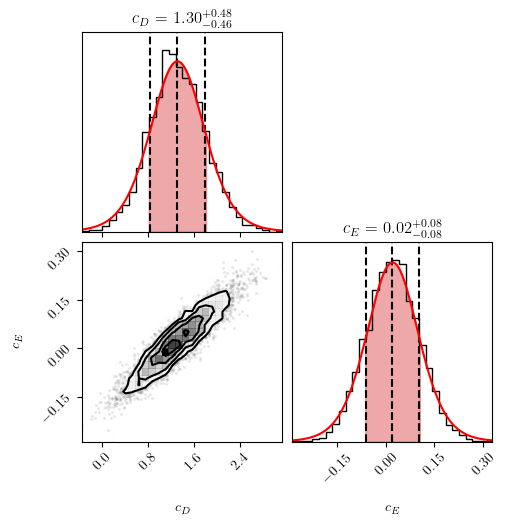

In [54]:

flat_samples = sampler.get_chain(discard=100, thin=1, flat=True)
fig = corner.corner(flat_samples, labels=[r"$c_D$", r"$c_E$"], color='k',
                show_titles=True, bins=30,quantiles=[0.16,0.5,0.84])

        def fill(cred_region, alpha):
            t_value_lower = stats.t.ppf(1-(1+cred_region)/2, df=df, loc=loc, scale=scale)
            t_value_upper = stats.t.ppf((1+cred_region)/2, df=df, loc=loc, scale=scale)
            ax.fill_between(x, pdf_fitted, where=((x >= t_value_lower) & (x <= t_value_upper)), 
                        color='r', alpha=alpha)
        
        fill(0.95, 0.25)
        fill(0.68, 0.5)
    else:
        contour_ax = fig.get_axes()[2]

        mv_fit = stats.multivariate_normal.fit(flat_samples)
        mv_means = mv_fit[0]
        mv_cov = mv_fit[1]

        x, y = np.mgrid[-2.5:2.5:.01, -1:1:.01]
        pos = np.dstack((x, y))

        mv_pdf = stats.multivariate_normal(mean=mv_means, cov=mv_cov)
        test = mv_pdf.pdf((mv_means[0], mv_means[1]))
        test_sigma = mv_pdf.pdf((mv_means[0]-np.sqrt(mv_cov[0, 0]), mv_means[1]-np.sqrt(mv_cov[1, 1])))
        test_2sigma = mv_pdf.pdf((mv_means[0]-2*np.sqrt(mv_cov[0, 0]), mv_means[1]-2*np.sqrt(mv_cov[1, 1])))
        
        lines1 = contour_ax.contourf(x, y, mv_pdf.pdf(pos), levels=[test_2sigma, test], colors='r', alpha=0.25)
        lines2 = contour_ax.contourf(x, y, mv_pdf.pdf(pos), levels=[test_sigma, test], colors='r', alpha=0.5)
        contour_ax.contour(lines1, levels=lines1.levels[:1], colors='k')
        contour_ax.contour(lines2, levels=lines2.levels[:1], colors='k')

    # Generate the t-distribution PDF using the fitted parameters
    x = np.linspace(bin_left_edges.min(), bin_left_edges.max(), 1000)
    pdf_fitted = stats.t.pdf(x, df=10, loc=loc, scale=scale) * area
    # Plot the t-distribution PDF over the histogram
    ax.plot(x, pdf_fitted, 'r-')

    t_value_lower = stats.t.ppf(0.16, df=10, loc=loc, scale=scale)
    t_value_upper = stats.t.ppf(0.84, df=10, loc=loc, scale=scale)

        contour_ax.axhline(mv_means[1], color='gray', linestyle='-', alpha=0.3)
        contour_ax.axvline(mv_means[0], color='gray', linestyle='-', alpha=0.3)
    
    plt.show

    # Optionally, add a legend
    #ax.legend()